# SETUP

The first part of the code sets up the pca_wavelet network, the training comes later. Most of this code comes from the original authors

In [7]:
import sys
sys.path.append('../segmentation_helper')

import tensorflow as tf
import keras
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import data_loader as dl
import model_broker as mb
import os
import gc

In [8]:
gc.collect()

30321

In [9]:
tf.keras.backend.set_floatx("float64")

In [10]:
dataset = "pets"
loader = dl.DataLoader(IMAGE_SIZE=128,dataset=dataset)
img_ds = loader.import_processed_img()
seg_ds = loader.import_processed_seg()

In [ ]:
cardinality = img_ds.cardinality()
train_size = 7000
img_train = img_ds.take(train_size)
seg_train = seg_ds.take(train_size)
img_test = img_ds.skip(cardinality-train_size)
seg_test = seg_ds.skip(cardinality-train_size)

keep_percent 0.35275578932626656
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 9 keep_max 12.0
keep_channels 9
ufilts.shape (1, 1, 1, 27, 9)
end loop 32.0
Starting level 1


C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filegudxd1ib.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_first'), if_body, else_body, get_state, set_state, ('pad',), 1)
C:\Users\spurl\AppData\Local\Temp\__autograph_generated_filegudxd1ib.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  ag__.if_stmt((ag__.ld(self).data_format is 'channels_last'), if_body_1, else_body_1, get_state_1, set_state_1, ('pad',), 1)


Completing 16.0
pca shape tf.Tensor([81 81], shape=(2,), dtype=int32)
keep_channels 28 keep_max 144.0
keep_channels 28
ufilts.shape (1, 1, 1, 81, 28)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([252 252], shape=(2,), dtype=int32)
keep_channels 88 keep_max 1792.0
keep_channels 88
ufilts.shape (1, 1, 1, 252, 88)
end loop 8.0
saving to: models/pets_img
out.shape (1, 8, 8, 88)
keep_percent 0.35275578932626656
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 9 keep_max 12.0
keep_channels 9
ufilts.shape (1, 1, 1, 27, 9)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([81 81], shape=(2,), dtype=int32)
keep_channels 28 keep_max 144.0
keep_channels 28
ufilts.shape (1, 1, 1, 81, 28)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([252 252], shape=(2,), dtype=int32)
keep_channels 88 kee

array([[[0.17278551, 0.12991059, 0.02585784],
        [0.14590897, 0.11755037, 0.02223786],
        [0.16476907, 0.13073109, 0.02320581],
        ...,
        [0.22068015, 0.17567402, 0.04034927],
        [0.41712144, 0.29647195, 0.13728076],
        [0.45400488, 0.33084312, 0.14676586]],

       [[0.15393592, 0.12697037, 0.0247482 ],
        [0.16862746, 0.12156863, 0.02319049],
        [0.16778302, 0.13134192, 0.02159926],
        ...,
        [0.2813113 , 0.19877835, 0.07280465],
        [0.43641335, 0.31115004, 0.1502901 ],
        [0.46017158, 0.33130652, 0.17145567]],

       [[0.15793505, 0.12772097, 0.01871362],
        [0.15388423, 0.12574583, 0.02489468],
        [0.16669731, 0.12362324, 0.01967008],
        ...,
        [0.29001036, 0.21164024, 0.09194048],
        [0.42340687, 0.29126841, 0.14139093],
        [0.41663605, 0.3017157 , 0.14525123]],

       ...,

       [[0.27201384, 0.04753657, 0.08317919],
        [0.19041055, 0.03667375, 0.05428922],
        [0.22115023, 0

pred.shape (1, 8, 8, 88)
recon.shape (64, 64, 3)
sample.dtype <dtype: 'float64'>
recon[0].dtype <dtype: 'float64'>
np.prod(sample.shape) 12288
psnr =  25.6821793610835
ncc =  [[1.         0.97181437]
 [0.97181437 1.        ]]
sample[30:34,30:34,0] tf.Tensor(
[[0.62113208 0.61770451 0.40046149 0.43425629]
 [0.50878525 0.42210287 0.43038833 0.49343026]
 [0.49877167 0.53034526 0.47739545 0.45471913]
 [0.51039279 0.3877719  0.52719826 0.57079601]], shape=(4, 4), dtype=float64)
recon[30:34,30:34,0] tf.Tensor(
[[0.58511404 0.52294971 0.49443887 0.48093081]
 [0.54394575 0.51791811 0.42226225 0.45017411]
 [0.48179074 0.41080746 0.38585099 0.47328002]
 [0.50623021 0.38455417 0.4901277  0.55596044]], shape=(4, 4), dtype=float64)


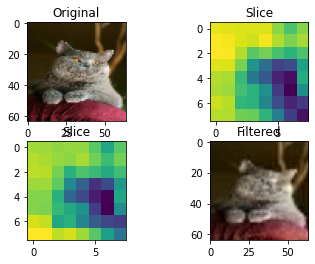

In [5]:
img_broker = mb.ModelBroker(trainset=img_train,
                            testset=img_test,
                            dirname=dataset+"_img",
                            keep_percent=0.5,
                            count=3,
                            sample_size=100)
                            #activity_regularizer = scaledtanh,
                            #inverse_activity_regularizer=scaledatanh,
                            #activation_before=True)
imghead,imginvhead = img_broker.build_model()
imghead,imginvhead = img_broker.load_model()                                      
img_broker.check_build(imghead,imginvhead,img_train)

keep_percent 0.35275578932626656
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 9 keep_max 12.0
keep_channels 1
ufilts.shape (1, 1, 1, 27, 1)
end loop 32.0
Starting level 1
Completing 16.0
pca shape tf.Tensor([9 9], shape=(2,), dtype=int32)
keep_channels 3 keep_max 16.0
keep_channels 1
ufilts.shape (1, 1, 1, 9, 1)
end loop 16.0
Starting level 2
Completing 8.0
pca shape tf.Tensor([9 9], shape=(2,), dtype=int32)
keep_channels 3 keep_max 64.0
keep_channels 1
ufilts.shape (1, 1, 1, 9, 1)
end loop 8.0
saving to: models/pets_seg
out.shape (1, 8, 8, 1)
keep_percent 0.35275578932626656
meanimg.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
self.mean.dtype <dtype: 'float64'>
Starting level 0
Completing 32.0
pca shape tf.Tensor([27 27], shape=(2,), dtype=int32)
keep_channels 9 keep_max 12.0
keep_channels 1
ufilts.shape (1, 1, 1,

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])>]
Consider rewriting this model with the Functional API.


InvalidArgumentError: slice index 1 of dimension 3 out of bounds. [Op:StridedSlice] name: strided_slice/

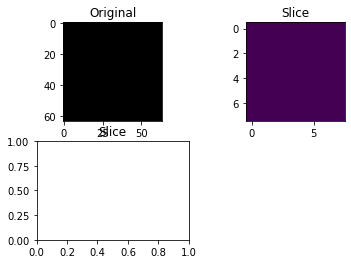

In [6]:
seg_broker = mb.ModelBroker(trainset=seg_train,
                            testset=seg_test,
                            dirname=dataset+"_seg",
                            keep_percent=0.5,
                            count=3,
                            sample_size=100)
                            #activity_regularizer =scaledtanh ,
                            #inverse_activity_regularizer=scaledatanh ,
                            #activation_before=False)
seghead,seginvhead = seg_broker.build_model()                                        
seghead,seginvhead = seg_broker.load_model()
seg_broker.check_build(seghead,seginvhead,seg_test)

# Training

This is the loop used to find the variables to find A and b in y=Ax+b

In [ ]:
reconstruct = next(iter(seg_train))[0].shape

In [ ]:
n = 0.0

imdecom_shape = imghead(next(iter(img_train))[0]).shape
img_channels = imdecom_shape[3] # shape_0
imdecom_2d_shape = imdecom_shape[1]*imdecom_shape[2] #shape_1

seg_channels = segdecom_shape[3] # shape_0
segdecom_2d_shape = segdecom_shape[1]*segdecom_shape[2] #shape_1
segdecom_shape = seghead(next(iter(seg_train))[0]).shape

xxt = np.zeros([img_channels,img_channels])
yxt = np.zeros([img_channels,seg_channels])
x = np.ones([imdecom_2d_shape])
x_m = np.zeros([img_channels])
y = np.ones([segdecom_2d_shape]) 
y_m = np.zeros([seg_channels])

bar = tqdm.notebook.tqdm(total = int(img_train.cardinality()))

for item in iter(zip(img_train,seg_train)):
    bar.update(1)
    image = item[0][0]
    segmentation = item[1][0]
    
    imgdecom = imghead(image)
    segdecom = seghead(segmentation)
    
    mat = tf.reshape(imgdecom,[-1,seg_channels])
    segmat = tf.reshape(segdecom,[-1,img_channels])
    
    cov = tf.tensordot(mat,mat,[0,0])
    xxt += cov
    #del cov
    
    segcov = tf.tensordot(mat,segmat,[0,0])
    yxt += segcov
    #del segcov
    
    x_m += tf.linalg.matvec(mat,x,transpose_a=True)
    y_m += tf.linalg.matvec(segmat,y,transpose_a=True)
    
    n += 1
    

In [ ]:
directory = "pca_vars/"+dataset+"_seg2img"
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
np.save(directory+"/xxt",xxt)
np.save(directory+"/yxt",yxt)
np.save(directory+"/x_m",x_m)
np.save(directory+"/y_m",y_m)
np.save(directory+"/n",n)

## Calculating A and B

This section uses the values found in the training loop to calculate values for A and B

In [ ]:
xxt = np.load(directory+"/xxt.npy")
yxt = np.load(directory+"/yxt.npy")
x_m = np.load(directory+"/x_m.npy")
y_m = np.load(directory+"/y_m.npy")
n = np.load(directory+"/n.npy")

In [ ]:
xxt = xxt - tf.matmul([x_m],[x_m],transpose_a=True)/n
yxt = yxt - tf.matmul([x_m],[y_m],transpose_a=True)/n

In [ ]:
inverse_xxt = tf.linalg.pinv(xxt)

In [ ]:
A = tf.matmul(inverse_xxt,yxt)

In [ ]:
b = (y_m - tf.linalg.matvec(A,x_m,transpose_a=True))/n

In [ ]:
img_train, img_test = loader.import_processed_img()

In [ ]:
A_filter = tf.reshape(A,(1,1,seg_channels,seg_channels)) 

In [ ]:
threshold_intensity = 0.1

image,seg_base = next(iter(zip(img_train,seg_train)))
imgdecom = imghead(image[0])

conv = tf.nn.conv2d(imgdecom, A_filter,1,"VALID")
conv = tf.nn.bias_add(conv,b)
seg = seginvhead(conv)

plt.subplot(2,1,1)
plt.imshow(np.hstack([image,seg_base,seg[0]]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([tf.reduce_min(seg_base,2)==0,tf.reduce_min(seg[0],2)<threshold_intensity]))